# Library importation (à faire en fonction de ce qu'on utilise)

In [ ]:
import re
import string
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing

#from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
#from sklearn.linear_model import Perceptron
#from sklearn.preprocessing import Normalizer

In [ ]:
import nltk 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoineluciano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from transformers import TFBertModel,BertTokenizer,BertTokenizerFast

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pip show transformers

Name: transformers
Version: 3.1.0
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Sam Shleifer, Patrick von Platen, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages
Requires: packaging, requests, regex, tokenizers, tqdm, sentencepiece, filelock, numpy, sacremoses
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# Importation des données

A travers ce projet, nous allons effectuer une classification de texte, et plus particulièrement une analyse de sentiments. Pour ce faire, nous allons utiliser une base de données de tweets issue de Twitter en lien avec la crise de la COVID-19.

Dans un premier temps, nous allons procéder à une phase descriptive des données.

In [ ]:
# Emma
#train_df = pd.read_csv("/Users/emmakopp/Library/CloudStorage/OneDrive-UniversitéParis-Dauphine/MASH/NLP/archiveNLP/Corona_NLP_test.csv", encoding='latin-1')
#test_df = pd.read_csv("/Users/emmakopp/Library/CloudStorage/OneDrive-UniversitéParis-Dauphine/MASH/NLP/archiveNLP/Corona_NLP_train.csv", encoding='latin-1')

# Antoine
train_df = pd.read_csv("/Users/antoineluciano/Documents/Cours/MASH/NLP/Corona_NLP_train.csv", encoding='latin-1')
test_df = pd.read_csv("/Users/antoineluciano/Documents/Cours/MASH/NLP/Corona_NLP_test.csv", encoding='latin-1')

# Thomas 
#train_df = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1')
#test_df = pd.read_csv("Corona_NLP_test.csv", encoding='latin-1')

# 1) Analyse et traitements des données


## Description des données 


La base de données contient près de 45000 tweets en lien avec la crise de la COVID 19. Notre base d'entrainement contiendra 41157 observations tandis que notre base test sera composée de 3798 observations. 

Pour chaque tweet, nous avons les informations suivantes : 

- Date de publication  
- Lieu de la publication (si disponible) 
- Contenu 
- Sentiment en lien avec le tweet (extrêmement positif, positif, neutre, négatif, extrêmement négatif) 


Ces tweets ont été écrits au début de la pandémie entre Janvier et Décembre 2020.
 

Il peut être intéressant d'étudier la proportion de tweets par pays et en particulier d'étudier la distribution de notre variable cible ("Sentiment")

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Shapes 
train_df.shape, test_df.shape

((41157, 6), (3798, 6))

In [ ]:
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [ ]:
print(len(pd.unique(train_df['Location'])))
train_df.loc[train_df['Location']== "London, England", 'Location'] = 'United Kingdom'
train_df.loc[train_df['Location']== "London", 'Location'] = 'United Kingdom'
train_df.loc[train_df['Location']== "London, UK", 'Location'] = 'United Kingdom'
train_df.loc[train_df['Location']== "UK", 'Location'] = 'United Kingdom'
train_df.loc[train_df['Location']== "England, United Kingdom", 'Location'] = 'United Kingdom'


train_df.loc[train_df['Location']== "New York, NY", 'Location'] = 'United States'
train_df.loc[train_df['Location']== "Washington, DC", 'Location'] = 'United States'
train_df.loc[train_df['Location']== "Los Angeles, CA", 'Location'] = 'United States'
train_df.loc[train_df['Location']== "Los Angeles", 'Location'] = 'United States'
train_df.loc[train_df['Location']== "USA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Chicago, IL", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="California, USA", 'Location'] = 'United States'

train_df.loc[train_df['Location']=="Philadelphia, PA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Florida, USA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="New York, USA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="New York City", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="San Francisco, CA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Boston, MA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="New York", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Atlanta, GA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Austin, TX", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Houston, TX", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Texas, USA", 'Location'] = 'United States'
train_df.loc[train_df['Location']=="Mumbai, India", 'Location'] = 'India'
train_df.loc[train_df['Location']=="New Delhi, India", 'Location'] = 'India'

train_df.loc[train_df['Location']=="Toronto, Ontario", 'Location'] = 'Canada'
train_df.loc[train_df['Location']=="Toronto", 'Location'] = 'Canada'

train_df.loc[train_df['Location']=="Worldwide", 'Location'] = 'Global'

12221


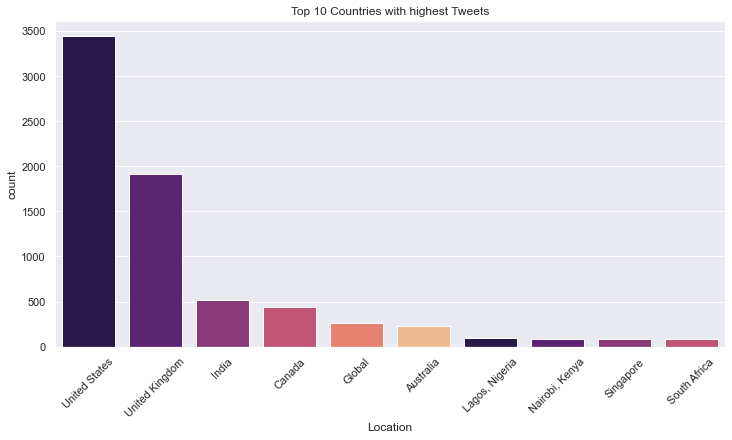

In [ ]:
#Top 10 Countries 
plt.figure(figsize = (12,6))
plt.title('Top 10 pays avec le plus de  Tweets')
countries =sns.countplot(x = 'Location', data=train_df, order=train_df['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

Nous pouvons observer les différents pays dont proviennent ces tweets. Sans surprise, ce ne sont que des pays anglophones.  ???? Utile ????

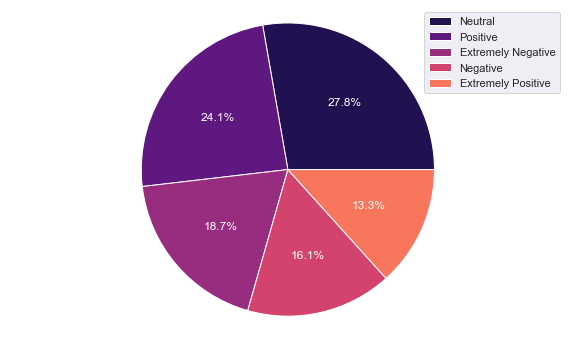

In [ ]:
# Delete Nan value
train_df.dropna(subset=['Sentiment'], how='all', inplace=True)

#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train_df['Sentiment'].value_counts(), labels = train_df['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Afin de simplifier notre modèle, nous avons décidé de regrouper les classes "Extrêmement positif" et "positif" ainsi que "Extrêmement négatif" et "négatif". Ceci nous permettra d'obtenir de meilleures performances durant la phase de classification et ainsi valider notre approche. 

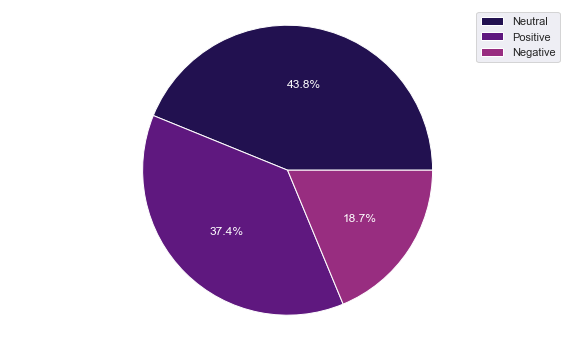

In [ ]:
train_df.loc[train_df['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 'Negative'
train_df.loc[train_df['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 'Positive'

test_df.loc[test_df['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 'Negative'
test_df.loc[test_df['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 'Positive'

plt.figure(figsize=(10,6))
plt.pie(train_df['Sentiment'].value_counts(), labels = train_df['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [ ]:
# Label for sentiment
test_df['label'] = test_df['Sentiment'].factorize()[0]
train_df['label'] = train_df['Sentiment'].factorize()[0]

## Traitement des tweets


Dans cette section, nous modifions le contenu de la colonne "Original Tweet" de sorte à ce qu'il soit utilisable pour le reste de l'étude.

En effet, du à la nature des textes considérés (tweets), il peut être judicieux de les rendre plus "propres" en enlevant les caractères spéciaux et abbréviations communément utilisés dans le contexte des réseaux sociaux.

In [ ]:
from nltk.corpus import stopwords
stop_word = stopwords.words('english')

In [ ]:
def clean(text):
    #     remove urls
    text = re.sub(r'http\S+', " ", text)
    #     remove mentions
    text = re.sub(r'@\w+',' ',text)
    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)
    #     remove digits
    text = re.sub(r'\d+', ' ', text)
    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])     
    return text

In [ ]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean(x))
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(lambda x: clean(x))

In [ ]:
train_df.iloc[0:5,4]

0                                                     
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia: Woolworths give elderly...
3    My food stock one empty... PLEASE, panic, THER...
4    Me, ready go supermarket outbreak. Not I'm par...
Name: OriginalTweet, dtype: object


On supprime ici les tweets vides après traitement.

In [ ]:
print("Train Dataset : ",len(np.where(train_df["OriginalTweet"]=="")[0]),"empty tweets removed")
train_df.drop(np.where(train_df["OriginalTweet"]=="")[0])
print("Test Dataset : ",len(np.where(test_df["OriginalTweet"]=="")[0]),"empty tweets removed")
test_df.drop(np.where(test_df["OriginalTweet"]=="")[0])

Train Dataset :  15 empty tweets removed
Test Dataset :  0 empty tweets removed


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,0
1,2,44954,"Seattle, WA",02-03-2020,"When I find hand sanitizer Fred Meyer, I turne...",Positive,1
2,3,44955,NaN,02-03-2020,Find protect loved ones . ?,Positive,1
3,4,44956,Chicagoland,02-03-2020,buying hits City anxious shoppers stock food&a...,Negative,0
4,5,44957,"Melbourne, Victoria",03-03-2020,One week everyone buying baby milk powder next...,Neutral,2
...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket Israel -- People da...,Positive,1
3794,3795,48747,"Farmington, NM",16-03-2020,Did panic buy lot non-perishable items? ECHO n...,Negative,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof Economics talking recent research co...,Neutral,2
3796,3797,48749,NaN,16-03-2020,Gov need somethings instead biar je rakyat ass...,Negative,0


## Word Cloud


De plus, afin d'obtenir une idée des mots et du vocabulaire utilisé dans les tweets de notre base de données, nous avons utilisé un "Nuage de mots". Ce dernier permet de visualiser des informations importantes issues d'une base de données textuelles. 

Plus un mot a une fréquence importante dans la base de données, plus il apparaîtra en gros sur le nuage de mots. 

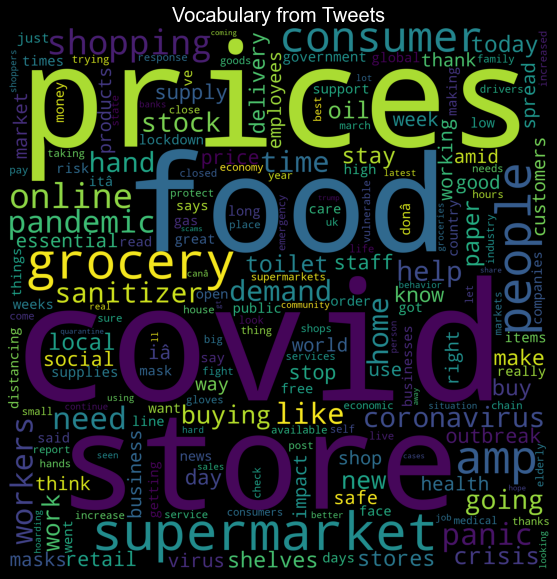

In [ ]:

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['OriginalTweet'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('dark_background')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Tweets", fontsize = 20)
plt.show()

Sans surprise, les mots "COVID" ou "coronavirus" sont omniprésents mais on retrouve également des sujets qui ont accompagné la crise tels que "supermarket", "grocery", "food", "masks" ou des termes encore plus atypiques comme "toiletpaper".


# 2) Extraction des données textutelles avec TF - IDF

$Tf$ signifie fréquence d'un terme tandis que $tf-idf$ signifie fréquence d'un terme multiplié par la fréquence inverse du document. Il s'agit d'un système de pondération des termes courant dans la recherche d'informations, qui a également fait ses preuves dans la classification des documents.

L'utilisation de $tf-idf$ au lieu des fréquences brutes d'occurrence d'un mot dans un document donné a pour but de réduire l'impact des mots qui se produisent très fréquemment dans un corpus donné et qui sont donc empiriquement moins informatifs que les caractéristiques qui se produisent dans une petite fraction du corpus de formation.

La formule utilisée pour calculer le $tf-idf$ pour un terme $t$ d'un document $d$ dans un ensemble de documents est : $$ tf-idf(t, d) = tf(t, d) * idf(t)$$et l'$idf$ est calculé comme suit : $$ idf(t) = log [ n / df(t) ] + 1 $$ (si $smooth_idf=False$), où $n$ est le nombre total de documents dans l'ensemble de documents et $df(t)$ est la fréquence de document de $t$ ; la fréquence des documents est le nombre de documents dans l'ensemble de documents qui contiennent le terme $t$.
L'ajout de "1" à l'$idf$ dans l'équation ci-dessus a pour effet que les termes dont l'$idf$ est nul, c'est-à-dire les termes qui apparaissent dans tous les documents d'un ensemble de formation ne seront pas entièrement ignorés. 

Si $smooth_idf=True$ (la valeur par défaut), la constante "1" est ajoutée au numérateur et au dénominateur de l'$idf$ comme si un document supplémentaire était vu contenant chaque terme de la collection exactement une fois, ce qui empêche les divisions zéro : $$idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1$$.

## 2.1) Count Vectorizer

In [ ]:
count_vect = CountVectorizer(stop_words = 'english') # stop_words = english --> neglige les "the" , "a"
X_train_counts = count_vect.fit_transform(train_df["OriginalTweet"])
X_train_counts.shape
# Le tf idf le plus élevé : X_train_counts.argmax()

(41157, 33376)

In [ ]:
X_train_counts.argmax()

253670338

In [ ]:
X_train_counts_df = pd.DataFrame(X_train_counts.todense())
X_train_counts_df.columns = sorted(count_vect.get_feature_names_out())
X_train_counts_df.sample()

,___,____,_____,_______,_________,__________,_______________,_________________________________,___â,_rs,...,zzzz,zâ,zã,zã¼rich,â²,â¹,â½,ã¼berweist,ã¼cretsiz,ã¼retime
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
argmaxx=X_train_counts_df.sum(axis=0).argmax()
print(X_train_counts_df.columns[argmaxx])

covid


In [ ]:
X_train_counts_df.head()

,___,____,_____,_______,_________,__________,_______________,_________________________________,___â,_rs,...,zzzz,zâ,zã,zã¼rich,â²,â¹,â½,ã¼berweist,ã¼cretsiz,ã¼retime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_counts = count_vect.transform(test_df["OriginalTweet"])
X_test_counts.shape

(3798, 33376)

In [ ]:
X_test_counts_df = pd.DataFrame(X_test_counts.todense())
X_test_counts_df.columns = sorted(count_vect.get_feature_names_out())
X_test_counts_df.sample(5)

,___,____,_____,_______,_________,__________,_______________,_________________________________,___â,_rs,...,zzzz,zâ,zã,zã¼rich,â²,â¹,â½,ã¼berweist,ã¼cretsiz,ã¼retime
1250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2) De Count Vect à TD-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()

train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
train_tfidf.shape

(41157, 33376)

In [ ]:
train_tfidf_df = pd.DataFrame(train_tfidf.todense())
train_tfidf_df.columns = sorted(count_vect.get_feature_names_out())
train_tfidf_df.sample(5)

,___,____,_____,_______,_________,__________,_______________,_________________________________,___â,_rs,...,zzzz,zâ,zã,zã¼rich,â²,â¹,â½,ã¼berweist,ã¼cretsiz,ã¼retime
19909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_tfidf = tfidf_transformer.transform(X_test_counts)
test_tfidf.shape

(3798, 33376)

# 3) Classification (avec encodage TD-IDF)

Voici les différents modèles utilisés dans cette partie, l'extraction des caractéristiques textuelle a été effectuée à l'aide de tf-idf, suivi de la matrice de confusion puis décomposition SVD et NMF.

                                    1. Multinominal Naive Bayes 
                                    2. Stochastic Gradient Descent Classifier (SGD)
                                    3. k Nearest Neighbors (kNN)
                                    4. Régression logistique
                                    5. Decision Tree
                                    6. Linear SVC
                                    

## 3.1) Multinomial Naive Bayes

MultinomialNB implémente l'algorithme naïf Bayes pour les données distribuées multinomiales et est l'une des deux variantes Bayes naïves classiques utilisées dans la classification de texte où les données sont généralement représentées par le nombre de vecteurs de mots ou avec les vecteurs tf-idf.

La distribution est paramétrée par des vecteurs θy=(θy1,…,θyn) pour chaque classe y, où n est le nombre de caractéristiques (dans la classification de texte, la taille du vocabulaire) et θyi est la probabilité de P(xi∣y) de la caractéristique i apparaissant dans un échantillon appartenant à la classe y.

Les paramètres θy sont estimés par une version "smoothed" du maximum de vraisemblance, c'est-à-dire le comptage de fréquence relative: 
                                            
                                            θyi=Nyi+α / Ny+αn.

où Nyi est le nombre de fois où la caractéristique i apparaît dans un échantillon de classe y dans l'ensemble d'apprentissage T.

### Prédiction

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=.01).fit(train_tfidf, train_df["Sentiment"])
predicted = clf.predict(test_tfidf)
MNB = accuracy_score(test_df["Sentiment"],predicted)
print(MNB)

0.6332280147446024


Il est interréssant de regarder la matrice de confusion pour chaque modèle pour voir les catégories qu'il n'arrive pas à vraiment distinguer.

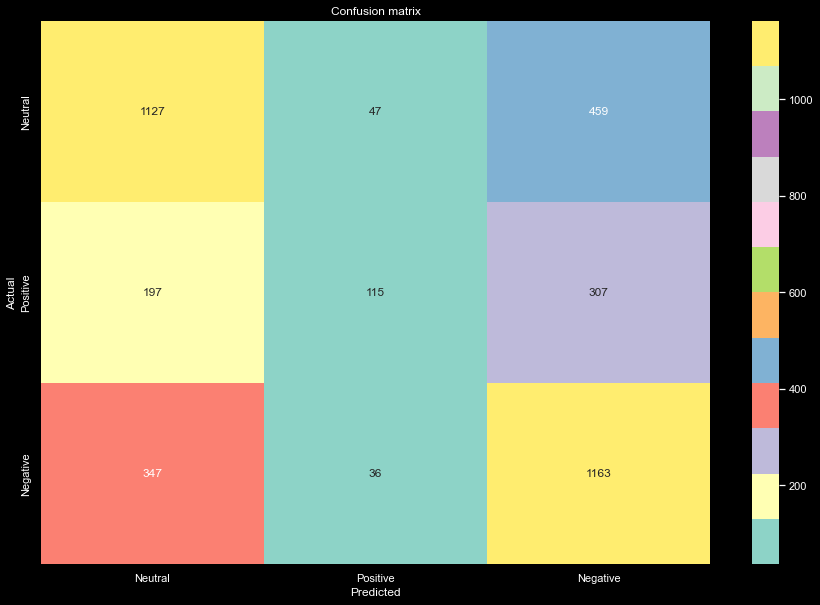

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_df["Sentiment"], predicted)
labels = train_df['Sentiment'].unique()[0:5]
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

On observe que les tweets "Neutre" et "Negative" sont plutôt bien prédits par notre modèle. Tandis qu'il predit très mal les tweets "Positive". 

### Réduction SVD

Afin de visualiser les données graphiquement, il faut les mettres en 2D. Pour cela, il existe plusieurs méthodes comme LDA ou ACP. Cependant, ces méthodes ne marchent pas bien avec des données textuelles (même après transformations en vecteur).
Pour ce type de cas, les decomposition qui sont plus adaptées sont les décomposition SVD et NMF. Nous allons donc visualiser les résultats de chaque modèle avec ces décomposition.

Ce transformateur effectue une réduction de la dimensionnalité linéaire au moyen d'une décomposition de valeur singulière tronquée (SVD). Contrairement à l'ACP, cet estimateur ne centre pas les données avant de calculer la décomposition en valeur singulière. Cela signifie qu'il peut travailler efficacement avec les matrices scipy.sparse.

En particulier, la SVD tronquée fonctionne sur les matrices de comptage de termes/tf-idf telles que renvoyées par les vectoriseurs dans sklearn.feature_extraction.text.

Cet estimateur prend en charge deux algorithmes : un solveur SVD rapide et aléatoire, et un algorithme "naïf" qui utilise ARPACK comme eigensolver sur $(X * X.T)$ ou $(X.T * X)$, selon ce qui est le plus efficace.

In [ ]:
# Palette 
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('pastel')
sns.set(palette=palette)

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  
/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


Text(0, 0.5, 'SVD component 2')

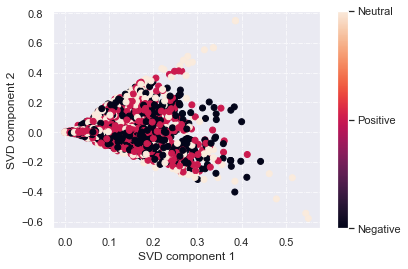

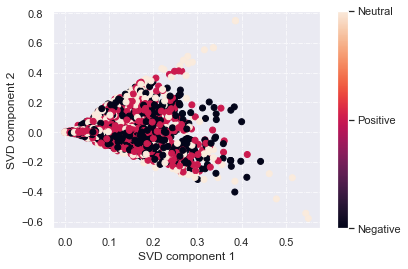

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2)
SVD=svd.fit_transform(test_tfidf)
plt.figure()
plt.scatter(SVD[:,0],SVD[:,1],c = test_df["label"])


formatter = plt.FuncFormatter(lambda i, args : test_df["Sentiment"].unique()[int(i)])


# Graphique 1
plt.grid(color='white', linestyle='-.', linewidth=0.7)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')
plt.figure()


# Graphique 2
plt.grid(color='white', linestyle='-.', linewidth=0.7)
plt.scatter(SVD[:,0],SVD[:,1],c = test_df["label"])
plt.colorbar(ticks=[0,1,2],format = formatter)
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')

On observe que le modèle n'a pas réussi à bien séparer les classes. 

### Décomposition NMF

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if __name__ == '__main__':
/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


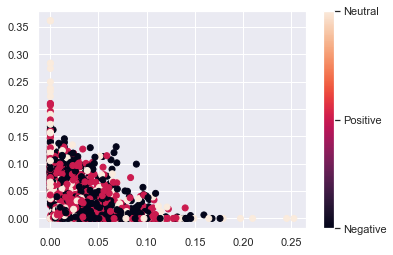

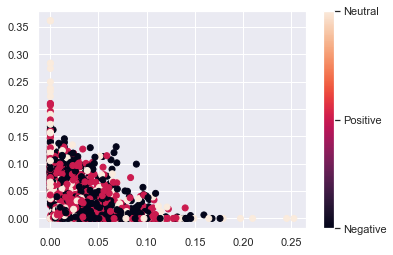

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2)
NMF=nmf.fit_transform(test_tfidf)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c = test_df["label"])


formatter = plt.FuncFormatter(lambda i, args : test_df["Sentiment"].unique()[int(i)])
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c = test_df["label"])
plt.colorbar(ticks=[0,1,2],format=formatter)

De même, on observe que les classes ne sont pas correctement séparées. Par la suite nous n'utiliserons plus ce type de décomposition pour nous aider dans notre objectif de classification. 

## 3.2) Stochastic Gradient Descent Classifier (SGD)

In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(train_tfidf, train_df["Sentiment"])
predictedSGD = clf.predict(test_tfidf)
SGD=accuracy_score(test_df["Sentiment"],predictedSGD)
print(SGD)

0.7759347024749869


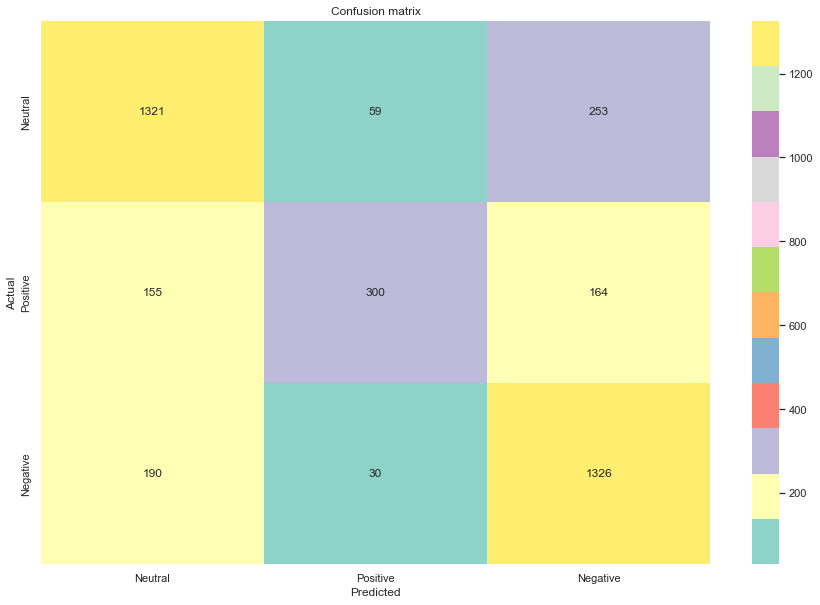

In [ ]:
conf_mat = confusion_matrix(test_df["Sentiment"], predictedSGD)
labels = train_df['Sentiment'].unique()[0:5]
# Plot confusion_matrixb
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

## 3.3) k Nearest Neighbors (kNN)


La classification basée sur les k voisins les plus proche est un type d'apprentissage basé sur des instances ou d'apprentissage non généralisant: elle ne tente pas de construire un modèle interne général, mais stocke simplement des instances des données d'apprentissage.
La classification est calculée à partir d'un vote à la majorité simple des voisins les plus proches de chaque point: un point se voit attribuer la classe de données qui a le plus de représentants parmi les voisins les plus proches du point.

Calcul de la distance euclidienne : $D_e(x, y) = \sqrt{\sum_{j=1}^{n} (x_j - y_j)^2}$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
fromclf = KNeighborsClassifier(weights='distance').fit(train_tfidf, train_df["Sentiment"])
predictedKNN = clf.predict(test_tfidf)
KNN = accuracy_score(test_df["Sentiment"],predictedKNN)
print(KNN)

0.7759347024749869


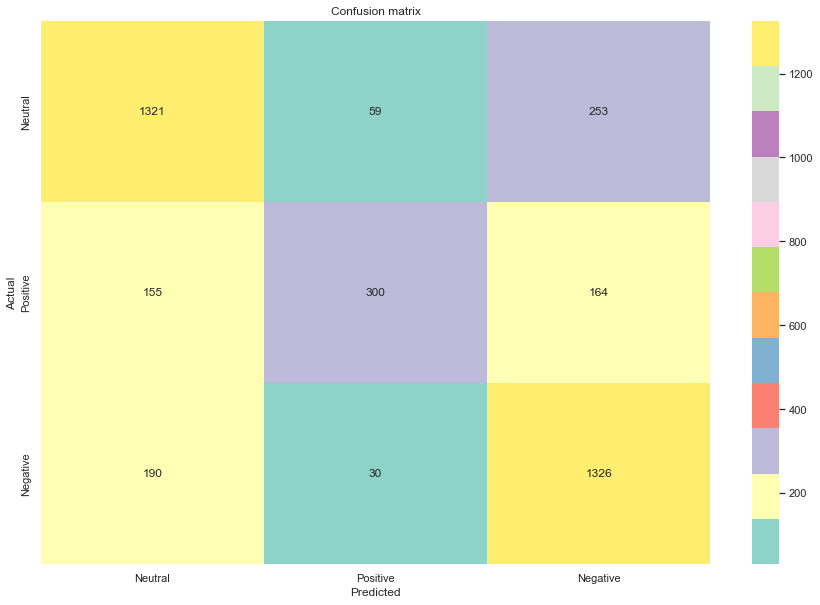

In [ ]:
conf_mat = confusion_matrix(test_df["Sentiment"], predictedKNN)
labels = train_df['Sentiment'].unique()[0:5]
# Plot confusion_matrixb
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

## 3.4) Régression Logistique 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf = clf.fit(train_tfidf, train_df["Sentiment"])
predicted = clf.predict(test_tfidf)
Rlog = accuracy_score( test_df["Sentiment"],predicted)
print(Rlog)

0.7914691943127962


/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 3.5) Decision tree

Les arbres de décision (DT) sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données.

Par exemple les arbres de décision apprennent à partir des données à se rapprocher d'une courbe sinusoïdale avec un ensemble de règles de décision "if-then-else". Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est adapté.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_tfidf, train_df["Sentiment"])
predicted = clf.predict(test_tfidf)
DT = accuracy_score(test_df["Sentiment"],predicted)
print(DT)

0.6018957345971564


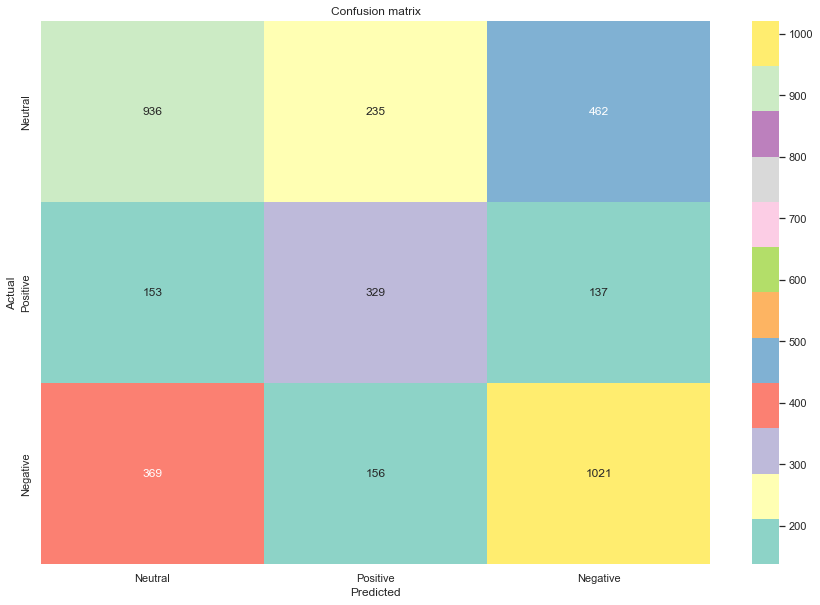

In [ ]:
conf_mat = confusion_matrix(test_df["Sentiment"], predicted)
labels = train_df['Sentiment'].unique()[0:5]
# Plot confusion_matrixb
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

## 3.6) Linear SVC

Une machine à vecteurs de support construit un hyperplan ou un ensemble d'hyperplan dans un espace de dimension élevée ou infinie, qui peut être utilisé pour la classification, la régression ou d'autres tâches. Intuitivement, une bonne séparation est obtenue par l'hyperplan qui a la plus grande distance aux points de données d'entraînement les plus proches de n'importe quelle classe (soi-disant marge fonctionnelle), car en général plus la marge est grande, plus l'erreur de généralisation du classificateur est faible.

In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(train_tfidf, train_df["Sentiment"])
predicted=clf.predict(test_tfidf)
SVC = accuracy_score(test_df["Sentiment"],predicted)
print(SVC)

0.8062137967351237


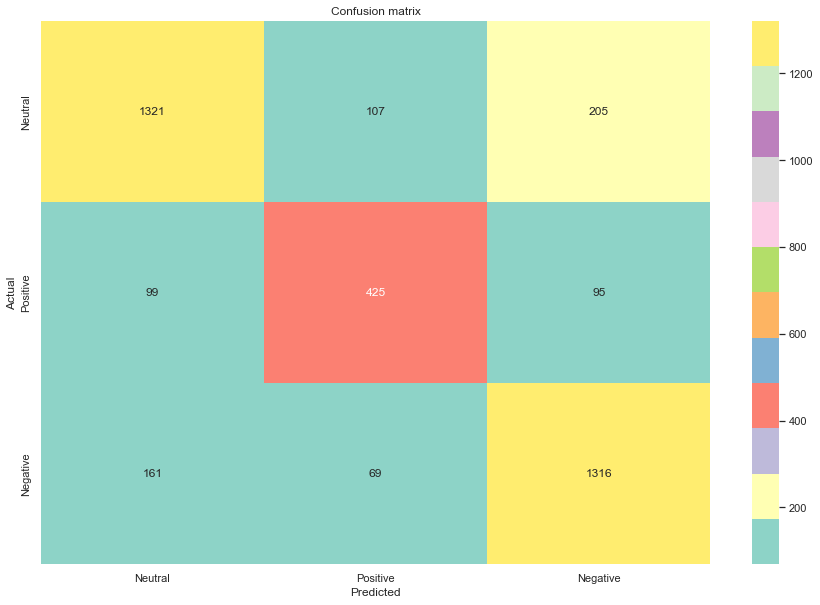

In [ ]:
conf_mat = confusion_matrix(test_df["Sentiment"], predicted)
labels = train_df['Sentiment'].unique()[0:5]
# Plot confusion_matrixb
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

## 3.7) Conclusion

Pour notre base de données, on voit que le classifieur qui présente la meilleure accuracy (0.80) est le Linear Support Vector Classifier tandis que l'arbre de décision a l'accuracy la plus faible (0.60). Le fait que l'arbre de décision présente une faible accuracy peut s'expliquer par le fait qu'il n'est pas évident dans notre cas d'établir des règles de décisions. 

# 4) Autre transformation et réseaux de neurones récurrents

## 4.1) Extraction des données textuelles avec Text_to_sequence (Tensorflow.keras)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
x_train = train_df['OriginalTweet'].copy()
x_test = test_df['OriginalTweet'].copy()

y_train = np.array(pd.get_dummies(train_df['label'].copy()))
y_test = np.array(pd.get_dummies(test_df['label'].copy()))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 42)

In [ ]:
max_len = np.max(x_train.apply(lambda x :len(x)))

Pour implémenter des modèles Tensorflow ou Keras, nous utilisons une autre forme de Token présente sur le package Keras.

La méthode fit_on_texts fait partie de la classe Keras tokenizer qui est utilisée pour mettre à jour le vocabulaire interne de la liste de textes.

On applique ensuite la méthode "Texts_to_sequence" qui transforme chaque texte du corpus en une liste d'entiers.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_length = len(tokenizer.word_index) + 1

x_train_token = tokenizer.texts_to_sequences(x_train)
x_test_token = tokenizer.texts_to_sequences(x_test)
x_val_token = tokenizer.texts_to_sequences(x_val)

x_train_token = pad_sequences(x_train_token, maxlen=max_len, padding='post')
x_test_token = pad_sequences(x_test_token, maxlen=max_len, padding='post')
x_val_token = pad_sequences(x_val_token, maxlen=max_len, padding='post')

In [ ]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 32175
Max sequence length: 286


In [ ]:
embedding_dim = 16

## 4.2) Modèle LSTM

On utilise ici un réseau de neurones LSTM comme étudié en cours. L'avantage d'utiliser ce type de réseaux de neurones est qu'il bénéficie d'une meilleure mémorisation des informations importantes. En utilisant les bons paramètres, le modèle est capable d'approcher le sens exact des mots et ainsi fournir la classification la plus appropriée.

In [ ]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.LSTM(176, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_LSTM.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

print(model_LSTM.summary())

2022-04-29 17:15:04.227226: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-29 17:15:04.228016: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 286, 16)           514800    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 286, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               135872    
_________________________________________________________________
dense (Dense)                (None, 3)                 531       
Total params: 651,203
Trainable params: 651,203
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#batch_size=64
#model.fit(x_train, y_train, epochs = 5, batch_size=batch_size, verbose =1)
num_epochs = 5
history_LSTM = model_LSTM.fit(x_train_token, y_train, epochs=num_epochs,validation_data=(x_val_token, y_val))

Train on 32925 samples, validate on 8232 samples
Epoch 1/5
32925/32925 [==============================] - 1095s 33ms/sample - loss: 1.0456 - accuracy: 0.4357 - val_loss: 1.0452 - val_accuracy: 0.4394
Epoch 2/5
32925/32925 [==============================] - 1082s 33ms/sample - loss: 1.0441 - accuracy: 0.4382 - val_loss: 1.0440 - val_accuracy: 0.4394
Epoch 3/5
32925/32925 [==============================] - 3535s 107ms/sample - loss: 1.0436 - accuracy: 0.4382 - val_loss: 1.0442 - val_accuracy: 0.4394
Epoch 4/5
32925/32925 [==============================] - 1226s 37ms/sample - loss: 1.0437 - accuracy: 0.4382 - val_loss: 1.0444 - val_accuracy: 0.4394
Epoch 5/5
32925/32925 [==============================] - 1209s 37ms/sample - loss: 1.0436 - accuracy: 0.4382 - val_loss: 1.0440 - val_accuracy: 0.4394


In [ ]:
accr = model_LSTM.evaluate(x_test_token,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3798/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Le modèle LSTM présente de manière générale de très bonnes performances lorsqu'il s'agit de classification de texte et d'analyse de sentiments. Ce n'est pas notre cas, nous obtenons une accuracy de 40%, ce qui est moins bon que nos précédants algorithmes. Il est possible que nous n'ayons pas choisis les paramètres adéquats au réseau de neuronne.

## 4.3) Modèle RNN bidirectionnel





On utilise ici un réseau de neurones récurrent bidirectionnel. Le principe de ce dernier est de connecter deux couches de directions opposées à une même couche de sortie. De ce fait, la couche de sortie obtient des informations des états passés et futurs simultanément. 


Ce type de réseau de neurones récurrent est particulièrement utilisés lorsque l'on a besoin de connaître le contexte des données d'entrée. Ainsi, dans notre cas il permet d'augmenter la performance de notre classification en tenant compte du contexte, notamment des mots qui précédents et suivent le mot considéré. On s'aide également dans notre modèle du *Global Average Pooling*.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 286, 16)           514800    
_________________________________________________________________
bidirectional (Bidirectional (None, 286, 512)          420864    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 968,691
Trainable params: 968,691
Non-trainable params: 0
________________________________________________

In [ ]:
tf.keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
num_epochs = 3
history = model.fit(x_train_token, y_train, epochs=num_epochs, 
                    validation_data=(x_val_token, y_val))

Train on 32925 samples, validate on 8232 samples
Epoch 1/3


2022-04-29 19:37:19.835008: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_gru_with_fallback_27219_27358' and '__inference___backward_standard_gru_27964_28523_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_29301' both implement 'gru_b5e321a8-5ca1-4fa3-ab0e-19f1876f7174' but their signatures do not match.


32896/32925 [============================>.] - ETA: 1s - loss: 0.9070 - accuracy: 0.5523

2022-04-29 20:07:55.897345: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_gru_with_fallback_32680' and '__inference_standard_gru_32591_specialized_for_sequential_1_bidirectional_forward_gru_StatefulPartitionedCall_at___inference_distributed_function_33331' both implement 'gru_10982c19-0bdb-411c-998a-91c8c6ba3df0' but their signatures do not match.


32925/32925 [==============================] - 1971s 60ms/sample - loss: 0.9067 - accuracy: 0.5525 - val_loss: 0.6334 - val_accuracy: 0.7562
Epoch 2/3
32925/32925 [==============================] - 2891s 88ms/sample - loss: 0.4863 - accuracy: 0.8285 - val_loss: 0.4351 - val_accuracy: 0.8482
Epoch 3/3
32925/32925 [==============================] - 16241s 493ms/sample - loss: 0.3158 - accuracy: 0.8992 - val_loss: 0.4386 - val_accuracy: 0.8506


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

Accuracy on training data is:- 89.92255330085754 %
Loss 31.58474535388121
Accuracy on validation data is:- 85.05830764770508 %
Loss 43.85851764991749


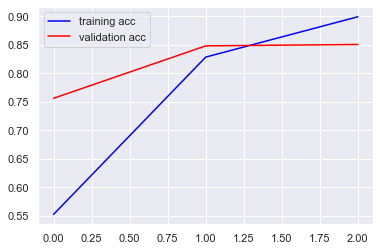

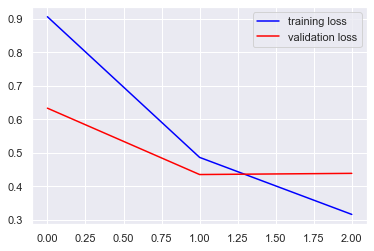

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(x_test_token)

2022-04-30 01:29:01.119934: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_gru_with_fallback_42586' and '__inference_standard_gru_42495_specialized_for_sequential_1_bidirectional_backward_gru_StatefulPartitionedCall_at___inference_distributed_function_42751' both implement 'gru_8cf4bc03-b43a-499e-8cb1-9bee26fb4d37' but their signatures do not match.


## Conclusion

Durant ce projet, nous nous sommes principalement concentré a des tweets en lien avec la Covid-19. Ces données étant textuelles, nous avons procédé à différentes transformations en vecteurs (principalement TF-IDF). Une fois ces données textuelles "vectorisées", nous avons appliqué plusieurs modèles d'apprentissage dessus afin de comparer lequel classait le mieux les documents. Afin de visualiser graphiquement les résulats de chaque modèle, nous avons utilisé des techniques de réduction de dimensions (SVD et NMF), mais cela n'a pas abouti.Notre conclusion est que pour les données textuelles, le modèle RNN Bidirectionnel obtient le meilleur taux de classification. Pour améliorer la performance des différents modèles d'apprentissage nous pourrions utiliser la méthode gridsearch pour trouver les paramètres optimaux. 